In [16]:
from main import PororoOcr

최초에 한번은 Model을 다운로드 합니다. 경로는 Windows의 경우 ```C:/pororo/misc```이고 Mac OS의 경우는 ```~/.pororo/misc/``` 입니다.

In [17]:
ocr = PororoOcr()

현재 지원 가능하는 언어는 영어와 한국어 입니다.

In [29]:
import cv2

image_path = "./4.jpg"
img = cv2.imread(image_path)
if img is None:
    print("Image not found or unable to load.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


In [30]:
from pororo import Pororo

ocr = PororoOcr()
image_path = "./4.jpg"
text = ocr.run_ocr(image_path, debug=True)
print('Result :', text)

Result : ['만화경도 넣을래', '그래']


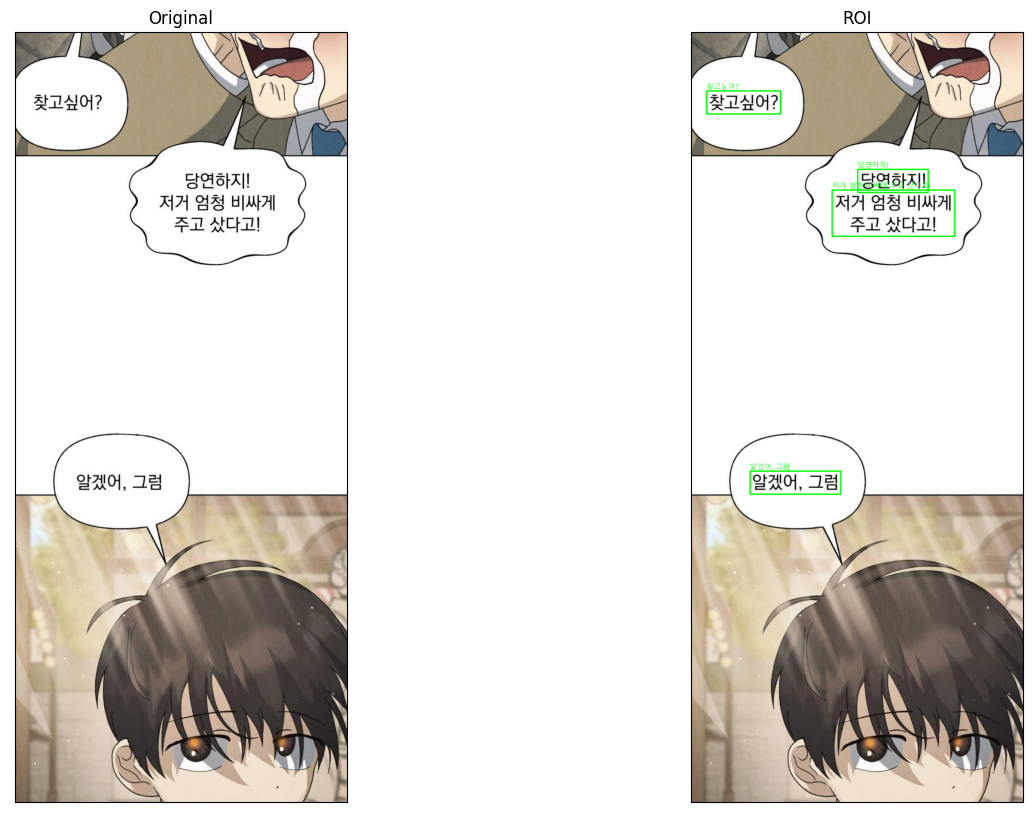

Result : ['찾고싶어?', '당연하지!', '저거 엄청 비싸게 주고 샀다고!', '알겠어, 그럼']


In [46]:
from pororo import Pororo

ocr = PororoOcr()
image_path = "webtoon_images/16/4.jpg"
text = ocr.run_ocr(image_path, debug=True)
print('Result :', text)

In [4]:


import os
from pororo import Pororo

# OCR 모델 불러오기 (언어는 한국어로 설정)
ocr = Pororo(task="ocr", lang="ko")

# 이미지 폴더 경로
root_dir = "./webtoon_images/"

# 숫자 기반으로 이미지 파일을 정렬하는 함수
def sorted_nicely(l):
    """ 자연스러운 정렬을 위한 함수 (숫자 포함 문자열 정렬) """
    import re
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# 이미지 파일을 불러와서 OCR 수행 후 텍스트 파일 저장하는 함수
def perform_ocr_and_save(root_dir):
    # 각 화 폴더(1, 2, 3, ...)에 접근
    for folder_name in sorted(os.listdir(root_dir)):
        folder_path = os.path.join(root_dir, folder_name)
        
        if os.path.isdir(folder_path):
            print(f"Processing folder: {folder_name}")
            
            # 텍스트를 저장할 리스트 초기화
            texts = []

            # 각 폴더 내의 이미지 파일(1.jpg, 2.jpg, 3.jpg 등)을 숫자 기반으로 정렬하여 가져와 OCR 실행
            image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]
            for image_name in sorted_nicely(image_files):
                image_path = os.path.join(folder_path, image_name).replace("\\", "/")
                print(f"Processing image: {image_path}")
                
                # OCR 실행 및 텍스트 추출
                text = ocr(image_path)
                print(f"Extracted Text from {image_name}: {text}")
                
                # 추출한 텍스트를 리스트에 추가
                texts.append(f"Image: {image_name}\n{text}\n")

            # 텍스트를 해당 폴더의 txt 파일로 저장
            txt_file_path = os.path.join(folder_path, f"{folder_name}.txt")
            with open(txt_file_path, 'w', encoding='utf-8') as f:
                f.write("\n".join(texts))

            print(f"Text file saved: {txt_file_path}")

# OCR 수행 후 텍스트 저장
perform_ocr_and_save(root_dir)


Processing folder: 1
Processing image: ./webtoon_images/1/2.jpg
Extracted Text from 2.jpg: []
Processing image: ./webtoon_images/1/3.jpg
Extracted Text from 3.jpg: []
Processing image: ./webtoon_images/1/4.jpg
Extracted Text from 4.jpg: ['만화경도 넣을래', '그래']
Processing image: ./webtoon_images/1/5.jpg
Extracted Text from 5.jpg: ['보물상자에 넣을 건 더 없어?', '응-']
Processing image: ./webtoon_images/1/6.jpg
Extracted Text from 6.jpg: ['아빠, 근데 꼭 여기에 넣어놔야 해?', '좋아하는 것들이라 계속 보고싶은데']
Processing image: ./webtoon_images/1/7.jpg


KeyboardInterrupt: 

In [9]:
import os
from pororo import Pororo

# OCR 모델 불러오기 (언어는 한국어로 설정)
ocr = Pororo(task="ocr", lang="ko")

# 이미지 폴더 경로
root_dir = "./webtoon_images/"

# 숫자 기반으로 이미지 파일을 정렬하는 함수
def sorted_nicely(l):
    """ 자연스러운 정렬을 위한 함수 (숫자 포함 문자열 정렬) """
    import re
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# 이미지 파일을 불러와서 OCR 수행 후 텍스트 파일 저장하는 함수
def perform_ocr_and_save(root_dir):
    # 각 화 폴더(2, 3, ..., 10)에 접근
    for folder_name in sorted_nicely(os.listdir(root_dir)):
        # 폴더 이름이 '2'에서 '10' 사이인 경우만 처리
        if folder_name.isdigit() and 28 <= int(folder_name) <= 42:
            folder_path = os.path.join(root_dir, folder_name)
            
            if os.path.isdir(folder_path):
                print(f"Processing folder: {folder_name}")
                
                # 텍스트를 저장할 리스트 초기화
                texts = []

                # 각 폴더 내의 이미지 파일(1.jpg, 2.jpg, 3.jpg 등)을 숫자 기반으로 정렬하여 가져와 OCR 실행
                image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg")]
                for image_name in sorted_nicely(image_files):
                    image_path = os.path.join(folder_path, image_name).replace("\\", "/")
                    print(f"Processing image: {image_path}")
                    
                    # OCR 실행 및 텍스트 추출
                    text = ocr(image_path)
                    print(f"Extracted Text from {image_name}: {text}")
                    
                    # 추출한 텍스트를 리스트에 추가
                    texts.append(f"Image: {image_name}\n{text}\n")

                # 텍스트를 해당 폴더의 txt 파일로 저장
                txt_file_path = os.path.join(folder_path, f"{folder_name}.txt")
                with open(txt_file_path, 'w', encoding='utf-8') as f:
                    f.write("\n".join(texts))

                print(f"Text file saved: {txt_file_path}")

# OCR 수행 후 텍스트 저장
perform_ocr_and_save(root_dir)


Processing folder: 28
Processing image: ./webtoon_images/28/1.jpg
Extracted Text from 1.jpg: ['해가 잘 들지 않아 그늘지고,', '그렇게 짙어진 땅은 자주 물러서,', '걸핏하면', '산이 무너지는 곳']
Processing image: ./webtoon_images/28/2.jpg
Extracted Text from 2.jpg: ['근처는 물가라 미끄럽고,', '해가 지면', '달도 안 보일 정도로 어두운']
Processing image: ./webtoon_images/28/3.jpg
Extracted Text from 3.jpg: ['반딧불이가--']
Processing image: ./webtoon_images/28/4.jpg
Extracted Text from 4.jpg: ['?!', '흑 아시는 곳 입니까?', ' 제 고향이에요']
Processing image: ./webtoon_images/28/5.jpg
Extracted Text from 5.jpg: ['그러니 가르쳐주세요.', "ㅈ가'", '대체 왜 거기서 일어났던 일이 여기 적혀있는 건지', '제발-']
Processing image: ./webtoon_images/28/6.jpg
Extracted Text from 6.jpg: []
Processing image: ./webtoon_images/28/7.jpg
Extracted Text from 7.jpg: ["그곳에는 ': 의사회 소속으로 다녀왔습니다.", '당시 일본은 풍토병 방역에 열을']
Processing image: ./webtoon_images/28/8.jpg
Extracted Text from 8.jpg: ['올리고 있었는데,', "그 병 중 하나가 '폐디스토마' 였습니다", '다슬기, 민물 게, 가재 등의 생식을 통해 니카신기 OL 기(굿시']
Processing image: ./webtoon_images/28/9.jpg
Extracted Text 

In [19]:
ocr.get_available_models()

{'en': ['brainocr'], 'ko': ['brainocr']}

**Examples** 
```python
ocr = Pororo(task='ocr', lang='ko')
ocr(IMAGE_PATH)
```

In [20]:
img_path = 'assets/images/test_image_1.jpg'

In [21]:
ocr.run_ocr(img_path, debug=True)

['메이크업존 MAKEUP ZONE', '드레스 피팅룸 DRESS FITTING ROOM', '포토존 PHOTO ZONE']

In [22]:
ocr.get_ocr_result()

{'description': ['메이크업존 MAKEUP ZONE',
  '드레스 피팅룸 DRESS FITTING ROOM',
  '포토존 PHOTO ZONE'],
 'bounding_poly': [{'description': '메이크업존 MAKEUP ZONE',
   'vertices': [{'x': 164, 'y': 250},
    {'x': 332, 'y': 250},
    {'x': 332, 'y': 322},
    {'x': 164, 'y': 322}]},
  {'description': '드레스 피팅룸 DRESS FITTING ROOM',
   'vertices': [{'x': 144, 'y': 566},
    {'x': 360, 'y': 566},
    {'x': 360, 'y': 640},
    {'x': 144, 'y': 640}]},
  {'description': '포토존 PHOTO ZONE',
   'vertices': [{'x': 504, 'y': 566},
    {'x': 640, 'y': 566},
    {'x': 640, 'y': 638},
    {'x': 504, 'y': 638}]}]}